# Анализ влияния различных факторов на стоимость медицинской страховки. Построение предиктивной модели стоимости страховки.

## 1. Загрузка данных и их исследование

In [17]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy.stats as sts
from scipy import stats
import numpy as np

In [18]:
# Загружаем датасет
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Датасет имеет 7 столбцов:
- age - возраст
- sex - пол (женский или мужской)
- bmi (body mass index) - индекс массы тела
- children - количество детей
- smoker - курит или не курит человек
- region - регион (принимает четыре значения southwest, southeast, northwest, northeast)
- charges - стоимость страховки

In [20]:
# Посмотрим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Датасет не имеет пропущенных значений. В датасете представлено 1338 строк.

Рассмотрим кратко каждый столбец датасета.

Столбец age (возраст) - дискретная величина, принимает только целые значения.

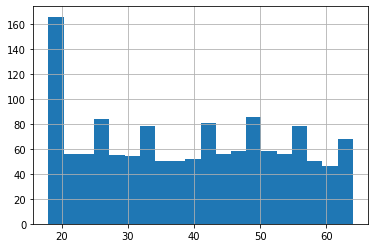

In [21]:
data.age.hist(bins = 20)

In [22]:
max(data.age), min(data.age)

(64, 18)

Диапазон значений от 18 до 64 лет. Преобладают люди молодого возраста 18-20 лет.

Столбец sex (пол) - категориальные данные, принимают значение либо male - мужчина, либо female - женщина.

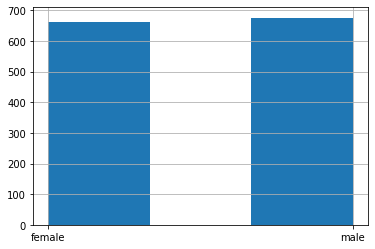

In [23]:
data.sex.hist(bins=3)

Переменная sex имеет биномиальное рапределение.

In [24]:
len(data[data['sex'] == 'male']), len(data[data['sex'] == 'female'])

(676, 662)

По количеству мужчин 676, женщин 662. Можно говорить о том, что датасет сбалансирован по количеству мужчин и женщин.

Столбец bmi (индекс массы тела) - непрерывная величина.

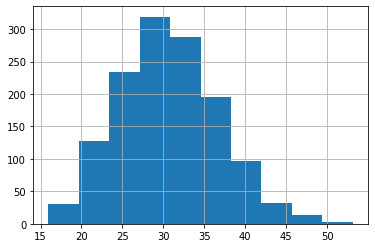

In [25]:
data.bmi.hist()

In [26]:
# Размах значений
min(data.bmi), max (data.bmi)

(15.96, 53.13)

In [27]:
# Среднее значение
data.bmi.mean()

30.663396860986538

Столбец children - количество детей, дискретная величина

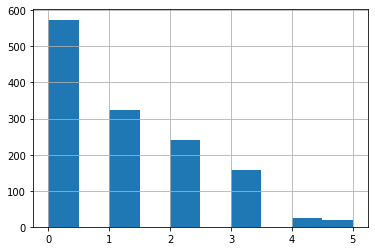

In [28]:
data.children.hist()

Как видно из гистограммы большинство не имеет детей. Максимальное количество детей - 5. 

Столбец smoker (курильщик) - категориальные данные, принимают значение либо yes - курит, либо no - не курит. Имеет биномиальное рапределение.

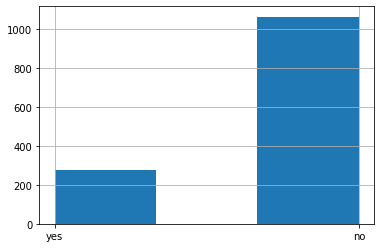

In [29]:
data.smoker.hist(bins=3)

Как видно из гистограммы, большинство представленных людей в датасете не курит.

In [30]:
len(data[data['smoker']=='no']), len(data[data['smoker']== 'yes'])

(1064, 274)

Столбец region (регион) - категориальные данные, принимает четыре значения southwest, southeast, northwest, northeast.

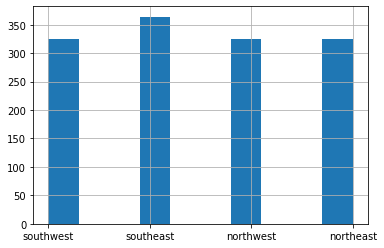

In [31]:
data.region.hist()

В датасете представлено примерно одинаковое количество людей из всех регионов.

Столбец charges(стоимость страховки) - непрерывная велчина.

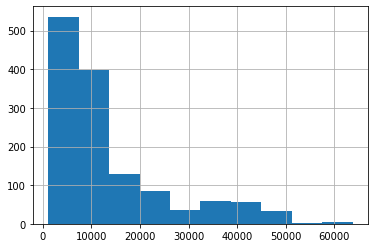

In [32]:
data.charges.hist()

Большая часть страховок со стоимостями до 20000. 

Посмотрим основные статистические характеристики датасета:

In [33]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Средний возраст людей в нашем датасете 39 лет, разброс возрастов от 18 до 64 лет. Средний индекс массы тела 30.7, в среднем у каждого человека по одному ребенку. Разброс стоимостей мед страховок - от 1121 до 63770.

In [34]:
statistics.mode(data['bmi'])

32.3

Чаще всего встречается индекс массы тела, равный 32.3

In [35]:
statistics.mode(data['age'])

18

Как было видно ранее из гистограммы, самый часто встречающийся возраст в выборке - 18 лет

In [36]:
statistics.mode(data['children'])

0

Как было также видно из соотвтествующей гистограммы, самое часто встречающееся количество детей - 0.

In [37]:
statistics.mode(data['charges'])

1639.5631

Самая часто встречающаяся величина стоимости страховки довольно низкая, всего 1639,6. 

## 2. Преобразование данных

Преобразуем все категориальные данные в датасете к бинарным. 

In [38]:
df = pd.get_dummies(data)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Столбцы sex_female, smoker_no излишни, удалим их:

In [40]:
df.drop(['sex_female', 'smoker_no'], axis='columns', inplace=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


Для удобства переименуем столбцы sex_male, smoker_yes:

In [41]:
df.rename(columns={'sex_male': 'sex', 'smoker_yes': 'smoker'}, inplace=True)
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


## 3. Исследование корреляций 

Построим матрицу корреляций и выясним, какие факторы оказывают наибольшее влияние на величину charges


In [42]:
corr_matrix = df.corr()
corr_matrix


,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


Как видно из матрицы корреляций, самая высокая корреляция стоимости страховки(charges) с показателем smoker. Также нужно обратить внимание на связь charges с bmi и age. Какой-либо корреляции charges c регионом, полом или количеством детей не прослеживается.

Построим график  pairplot в качестве визуализации зависимостей:

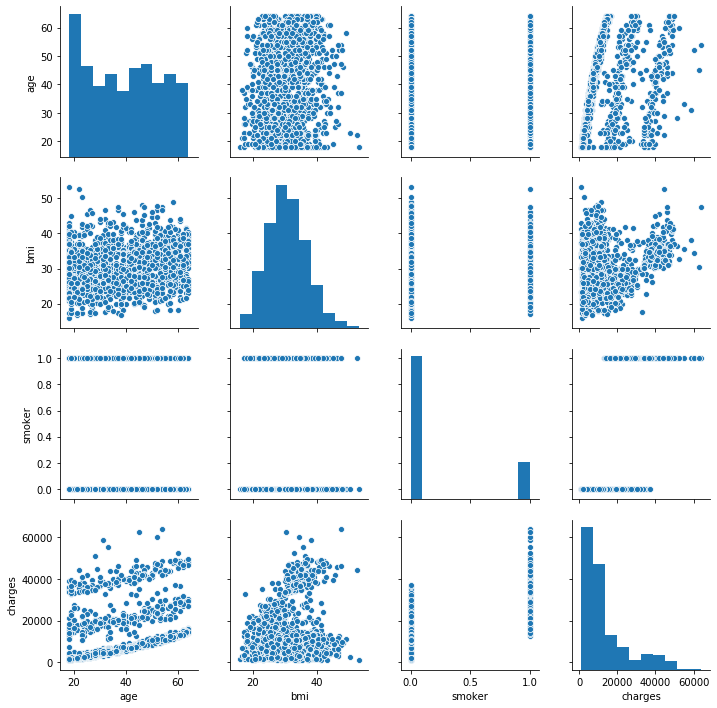

In [46]:
sns.pairplot(df, vars=['age','bmi','smoker','charges'], kind="scatter")

Построим график pairplot в разрезе показателя smoker:

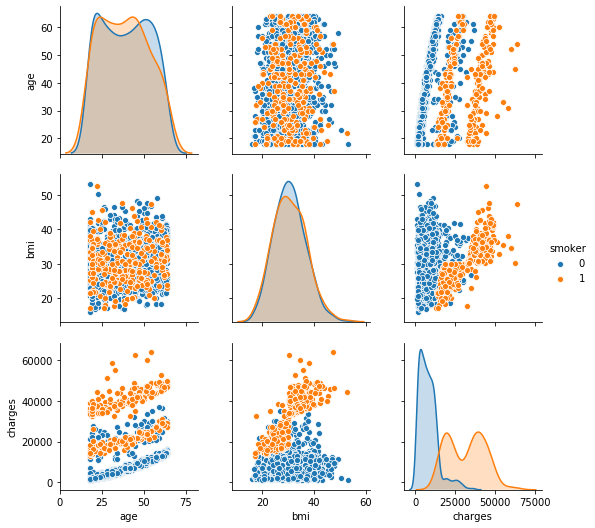

In [47]:
sns.pairplot(df, vars=['age','bmi','charges'], hue = 'smoker', kind="scatter")


Можно увидеть сильную корреляцию между стоимостью страховки для курящих и некурящих людей. Для курящих величина charges в среднем выше. Также для курящих людей прослеживается связь величины charges с величиной bmi, в то время как для некурящих такой связи не видно.

## 3. Построение модели линейной регрессии

Сначала построим модель линейной регрессии "в лоб", используя все предикторы:

In [48]:
df.columns


Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [49]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


Делим данные на тренировочные и тестовые:

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [52]:
len(x_train), len(x_test), len(data)


(1070, 268, 1338)

Применяем модель линейной регрессии:

In [53]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
predict_train_y = model.predict(x_train)
predict_test_y = model.predict(x_test)

## 4. Оценка модели

Проведем оценку полученной модели. Для этого начала визуализируем корреляциооную зависимость предсказанных данных с данными из датасета (тренировочных и тестовых):

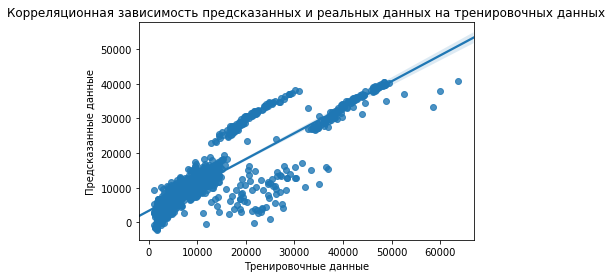

In [55]:
sns.regplot(x= y_train, y=predict_train_y, data=data, fit_reg=True)
plt.xlabel('Тренировочные данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тренировочных данных')
plt.grid(False)
plt.show()

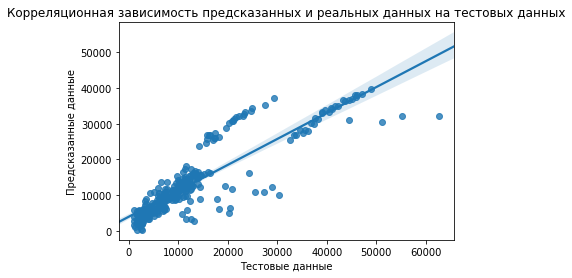

In [56]:
sns.regplot(x= y_test, y=predict_test_y, data=data, fit_reg=True)
plt.xlabel('Тестовые данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тестовых данных')
plt.grid(False)
plt.show()

Видим, что модель довольно неплохо справилась с предсказанием, однако разброс точек не постоянен, есть области, где разброс достаточно велик.

Оценим среднеквадратичную ошибку,коэффцициент детерминации и абсолютную среднюю ошибку:

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Среднеквадратичная ошибка модели:

In [62]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, predict_train_y),
        mean_squared_error(y_test, predict_test_y)))

MSE train: 36941538.196, test: 35040296.369


Коэффициент детерминации:

In [63]:
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, predict_train_y),
        r2_score(y_test, predict_test_y)))


R^2 train: 0.747, test: 0.766


Абсолютная средняя ошибка:

In [60]:
print('mean_absolute_error train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, predict_train_y),
        mean_absolute_error(y_test, predict_test_y)))

mean_absolute_error train: 4238.354, test: 4105.892


Получили довольно высокий коэффициент детерминации, что говорит о том, что модель примерно на 75% объясняет зависимость стоимости страховки от всех предикторов, которые мы использовали в модели.

Качество полученной модели также можно диагностировать с помощью связи между остатками модели и предсказаными значениями.С помощью такой визуализации можно увидеть нелинейность и выбросы, проверить нормальность распределения ошибки. 

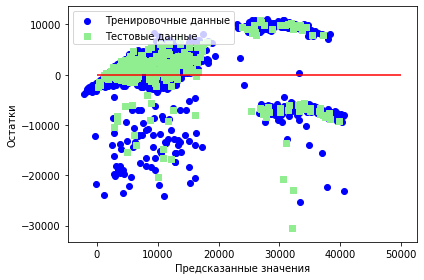

In [64]:
plt.scatter(predict_train_y,  predict_train_y - y_train,
            c='blue', marker='o', label='Тренировочные данные')
plt.scatter(predict_test_y,  predict_test_y - y_test,
            c='lightgreen', marker='s', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50000, color='red')
#plt.xlim([-10, 50])
plt.tight_layout()

Из полученного графика видно, что остатки распределены не нормально и неравномерно, есть выбросы в минус (действительно у нас много точек под регресионной прямой, это видно также на корреляционном графике предсказзанных и реальных данных).

## 5. Предсказание с помощью модели

Предскажем с помощью нашей модели стоимость страховки и сравним полученную стоимость с реальными стоимостями из датасета:

In [65]:
df[(df['age'] == 45) & (df['smoker'] == 1)]

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
85,45,22.895,2,21098.55405,1,1,0,1,0,0
327,45,36.480,2,42760.50220,1,1,0,1,0,0
917,45,22.895,0,35069.37452,1,1,1,0,0,0
1037,45,30.495,1,39725.51805,0,1,0,1,0,0
1300,45,30.360,0,62592.87309,1,1,0,0,1,0


In [67]:
# Создадим человека, с такими же показателями, как строка с индексом 917 и посмотрим, что предскажет модель
df_new = {'age':45, 'sex':1, 'bmi':22.895, 'children':0, 'smoker':1, 'region_northeast':0, 'region_northwest':1, 
      'region_southeast':0, 'region_southwest':0}
index = [1]
df_new= pd.DataFrame(df_new,index)
df_new

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1,45,1,22.895,0,1,0,1,0,0


In [68]:
prediction = model.predict(df_new)
print("Predicted medical Insurance cost is : ",prediction)

Predicted medical Insurance cost is :  [30467.12121248]


Абсолютная ошибка предсказания 35069 - 30467 = 4602. Относительная ошибка 15%.

## 6. Улучшение модели

Попробуем улучшить нашу модель (уменьшить разброс точек на корреляционной прямой зависимости предсказанных и реальных значений)

Для этого рассмотрим отдельно курящих и некурящих людей. Как было видно из графика pairplot выше, на величину charges влияют разные параметры в аком разрезе.

### 6.1. Построение модели линейной регрессии для некурящих

In [69]:
healthy_data = df[df['smoker'] == 0]

In [70]:
corr_matrix = healthy_data.corr()
corr_matrix

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.122638,0.033395,0.627947,-0.022338,NaN,0.006079,-0.008914,-0.029687,0.032819
bmi,0.122638,1.000000,0.019208,0.084037,0.019119,NaN,-0.123297,-0.137901,0.271417,-0.013792
children,0.033395,0.019208,1.000000,0.138929,0.002090,NaN,-0.020177,0.014083,-0.011721,0.017644
charges,0.627947,0.084037,0.138929,1.000000,-0.056320,NaN,0.068882,0.011806,-0.039426,-0.040092
sex,-0.022338,0.019119,0.002090,-0.056320,1.000000,NaN,0.000541,0.009820,0.005807,-0.016204
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_northeast,0.006079,-0.123297,-0.020177,0.068882,0.000541,NaN,1.000000,-0.326630,-0.331530,-0.326630
region_northwest,-0.008914,-0.137901,0.014083,0.011806,0.009820,NaN,-0.326630,1.000000,-0.340032,-0.335006
region_southeast,-0.029687,0.271417,-0.011721,-0.039426,0.005807,NaN,-0.331530,-0.340032,1.000000,-0.340032
region_southwest,0.032819,-0.013792,0.017644,-0.040092,-0.016204,NaN,-0.326630,-0.335006,-0.340032,1.000000


In [71]:
len(healthy_data)

1064

Визуализируем зависимость charges от age и от children, как паратметров с наибольшими показателями коэффициента линейной корреляции.

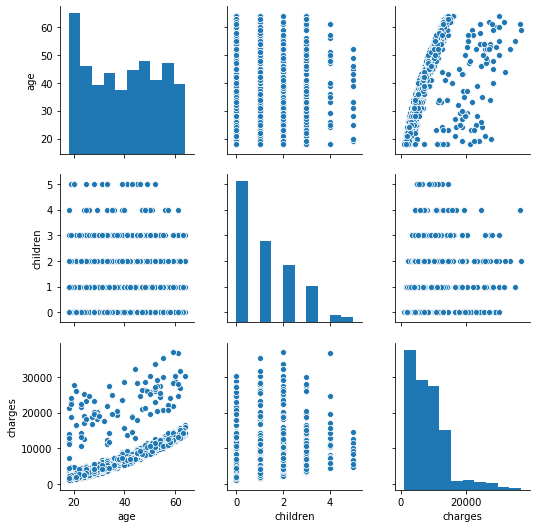

In [72]:
sns.pairplot(healthy_data, vars=['age','children', 'charges'], kind="scatter")

Из матрицы корреляций и из графика видно, что лучше всего charges коррелирует с age. Линейную зависимость с другими параметрами увидеть трудно, поэтому в модели линейной регрессии будем учитывать только age.

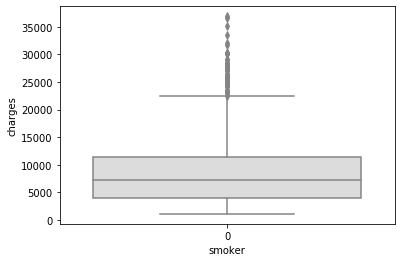

In [73]:
sns.boxplot(x='smoker', y='charges', data=healthy_data, palette="coolwarm")


Видно, что есть выбросы  charges при высоких значениях. В нашей модели ограничимся примерно 85% процентилем:

In [74]:
healthy_data.charges.quantile(.85)

13031.6790225

In [75]:
healthy_data_low = healthy_data[healthy_data['charges'] < 13031.6790225]
healthy_data_low.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1,18,33.77,1,1725.5523,1,0,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,0,1,0
4,32,28.88,0,3866.8552,1,0,0,1,0,0
5,31,25.74,0,3756.6216,0,0,0,0,1,0
6,46,33.44,1,8240.5896,0,0,0,0,1,0


In [76]:
len(healthy_data_low)

904

Построим модель линейной регрессии:

In [77]:
x = healthy_data_low[['age']]

y = healthy_data_low['charges']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [79]:
model_healthy = LinearRegression()
model_healthy.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
predict_train_y = model_healthy.predict(x_train)
predict_test_y = model_healthy.predict(x_test)

Оценка модели:

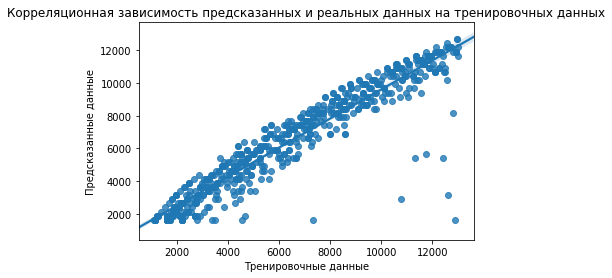

In [81]:
sns.regplot(x= y_train, y=predict_train_y, data=data, fit_reg=True)
plt.xlabel('Тренировочные данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тренировочных данных')
plt.grid(False)
plt.show()

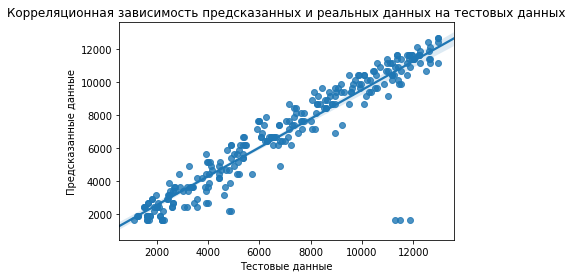

In [82]:
sns.regplot(x= y_test, y=predict_test_y, data=data, fit_reg=True)
plt.xlabel('Тестовые данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тестовых данных')
plt.grid(False)
plt.show()

Видим, что выбросы остались, но их стало значительно меньше. Связь стала намного более линейной.

In [83]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, predict_train_y),
        mean_squared_error(y_test, predict_test_y)))

MSE train: 1310613.424, test: 1703102.936


In [84]:
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, predict_train_y),
        r2_score(y_test, predict_test_y)))

R^2 train: 0.889, test: 0.864


In [85]:
print('mean_absolute_error train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, predict_train_y),
        mean_absolute_error(y_test, predict_test_y)))

mean_absolute_error train: 703.300, test: 721.538


Коэффициент детерминации увеличился, абсолютная средняя ошибка уменьшилась.

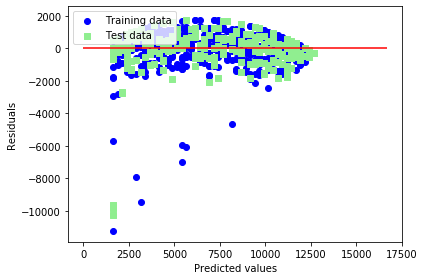

In [86]:
plt.scatter(predict_train_y,  predict_train_y - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(predict_test_y,  predict_test_y - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=16700, color='red')
#plt.xlim([-10, 50])
plt.tight_layout()

Остатки модели по-прежнему распределены не нормально, присутствуют выбросы в отрицательную сторону.

Предсказание с помощью модели ( предскажем с помощью нашей модели стоимость страховки и сравним полученную стоимость с реальными стоимостями из датасета):

In [109]:
healthy_data[healthy_data['age'] == 40].head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
54,40,28.690,3,8059.67910,0,0,0,1,0,0
67,40,26.315,1,6389.37785,1,0,0,1,0,0
68,40,36.190,0,5920.10410,0,0,0,0,1,0
154,40,25.460,1,7077.18940,0,0,1,0,0,0
209,40,41.230,1,6610.10970,1,0,1,0,0,0


In [112]:
len (healthy_data[healthy_data['age'] == 40])

22

In [116]:
# Посмотрим какой реальный разброс по charges для всех некурящих людей 40 лет
person_40 = healthy_data[healthy_data['age'] == 40]
min(person_40.charges), max (person_40.charges), person_40.charges.mean()

(5415.6612, 28476.734989999997, 8171.216648636363)

In [114]:
# Посмотрим, какую величину charges предскажет наша модель, основываясь лишь на том, 
# что есть данные о возрасте и о том, что человек не курит
heathy_person = {'age':40}
index = [1]
heathy_person = pd.DataFrame(heathy_person,index)
heathy_person

,age
1,40


In [115]:
prediction = model_healthy.predict(heathy_person)
print("Predicted medical Insurance cost is : ",prediction)

Predicted medical Insurance cost is :  [7157.28407538]


Будем сравнивать предсказаную ведичину со средним реальным значением из датасета. Абсолютная ошибка 8171 - 7157 = 1014, относительная ошибка 14%

### Можно сделать вывод, что модель для некурящих людей хорошо работает в случае небольших charges. Чем больше charges (выше значения 85% квантиля), тем прогностическая сила модели хуже.

### 6.2. Построение модели линейной регрессии для курящих

In [87]:
smokers_data = df[df['smoker'] == 1]

In [88]:
len(smokers_data)

274

In [89]:
corr_matrix = smokers_data.corr()
corr_matrix

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.059674,0.081183,0.368224,-0.005758,NaN,-0.011290,0.030313,0.061987,-0.089901
bmi,0.059674,1.000000,-0.012619,0.806481,0.148350,NaN,-0.193326,-0.128827,0.267021,0.024379
children,0.081183,-0.012619,1.000000,0.035945,0.076907,NaN,-0.033675,0.073008,-0.069078,0.042066
charges,0.368224,0.806481,0.035945,1.000000,0.101226,NaN,-0.117370,-0.083583,0.171069,0.009843
sex,-0.005758,0.148350,0.076907,0.101226,1.000000,NaN,-0.015134,-0.084307,0.034441,0.060521
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_northeast,-0.011290,-0.193326,-0.033675,-0.117370,-0.015134,NaN,1.000000,-0.294808,-0.401187,-0.294808
region_northwest,0.030313,-0.128827,0.073008,-0.083583,-0.084307,NaN,-0.294808,1.000000,-0.365412,-0.268519
region_southeast,0.061987,0.267021,-0.069078,0.171069,0.034441,NaN,-0.401187,-0.365412,1.000000,-0.365412
region_southwest,-0.089901,0.024379,0.042066,0.009843,0.060521,NaN,-0.294808,-0.268519,-0.365412,1.000000


Из матрицы корреляций видно, что charges лучше всего коррелирует с bmi. Также довольно высокий коэффициент корреляции charges и age.

Визуализируем зависимость charges от age и от bmi, как паратметров с наибольшими показателями коэффициента линейной корреляции.

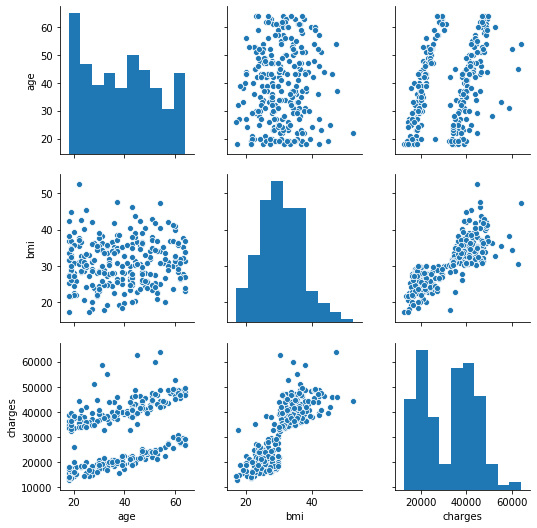

In [90]:
sns.pairplot(smokers_data, vars=['age','bmi', 'charges'], kind="scatter")

Построим модель линейной регрессии:

In [99]:
x = smokers_data[['age', 'bmi']]
y = smokers_data['charges']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [101]:
model_smokers = LinearRegression()
model_smokers.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
predict_train_y = model_smokers.predict(x_train)
predict_test_y = model_smokers.predict(x_test)

Проведем оценку модели:

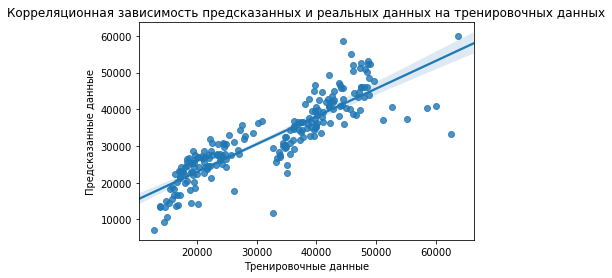

In [103]:
sns.regplot(x= y_train, y=predict_train_y, data=data, fit_reg=True)
plt.xlabel('Тренировочные данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тренировочных данных')
plt.grid(False)
plt.show()

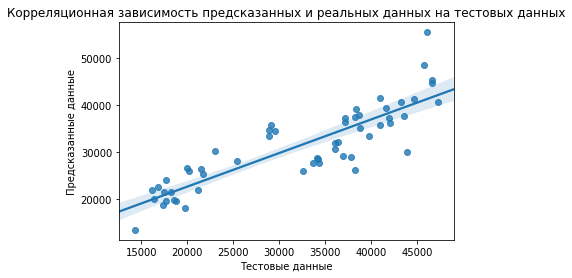

In [104]:
sns.regplot(x= y_test, y=predict_test_y, data=data, fit_reg=True)
plt.xlabel('Тестовые данные')
plt.ylabel('Предсказанные данные')
plt.title('Корреляционная зависимость предсказанных и реальных данных на тестовых данных')
plt.grid(False)
plt.show()

Видим, что разброс точек получился более равномерным, выбросов стало намного меньше.

In [105]:
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, predict_train_y),
        r2_score(y_test, predict_test_y)))

R^2 train: 0.755, test: 0.741


In [106]:
print('mean_absolute_error train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, predict_train_y),
        mean_absolute_error(y_test, predict_test_y)))

mean_absolute_error train: 4497.333, test: 4386.740


Коэффициент детерминации и абсолютная средняя ошибка остались на прежнем уровне (по сравнению с моделью линейной регрессии, где не было разделения на курящих и некурящих).

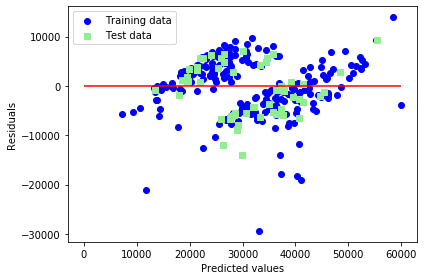

In [107]:
plt.scatter(predict_train_y,  predict_train_y - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(predict_test_y,  predict_test_y - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=60000, color='red')
#plt.xlim([-10, 50])
plt.tight_layout()

Распределение остатков модели также стало лучше (меньше выбросов, разброс точек уменьшелся).

Предсказание с помощью модели ( предскажем с помощью нашей модели стоимость страховки и сравним полученную стоимость с реальными стоимостями из датасета):

In [117]:
smokers_data[smokers_data['age'] == 40].head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
235,40,22.220,2,19444.26580,0,1,0,0,1,0
266,40,19.800,1,17179.52200,1,1,0,0,1,0
280,40,28.120,1,22331.56680,0,1,1,0,0,0
422,40,32.775,1,39125.33225,1,1,1,0,0,0
667,40,32.775,2,40003.33225,0,1,0,1,0,0


In [118]:
#Создадим человека, с такими же показателями, как строка с индексом 235 и посмотрим, что предскажет модель
smokers_person = {'age':40, 'bmi':22.22}
index = [1]
smokers_person = pd.DataFrame(smokers_person,index)
smokers_person

,age,bmi
1,40,22.22


In [119]:
prediction = model_smokers.predict(smokers_person)
print("Predicted medical Insurance cost is : ",prediction)

Predicted medical Insurance cost is :  [20236.0012183]


Будем сравнивать предсказаную ведичину со средним реальным значением из датасета. Абсолютная ошибка 20236 - 19444 = 792, относительная ошибка 4%

### Можно сделать вывод, что модель для курящих людей стала лучше, так как стало заметно меньше выбросов и остатки распределены лучше (хотя коэффициент детерминации остался на прежнем уровне).